In [ ]:
# establishing directories
ROOTDIR = os.getcwd() # Home directory
OUTPUTDIR = ROOTDIR + '/OUTPUT/' # Output directory
os.chdir(OUTPUTDIR) # Change directory

# User input
sitename = "ONAQ"
start_date = '01-01-2019'
end_date = '12-31-2019'

# import data based on selected dates
df_timeseries = pd.read_csv(str(sitename)+'_daily_timeseries.csv')
df_timeseries['DateTime'] = pd.to_datetime(df_timeseries['DateTime'])
mask = (df_timeseries['DateTime'] >= start_date) & (df_timeseries['DateTime'] <= end_date)
df_timeseries = df_timeseries.loc[mask]

# assigning variables
t = df_timeseries['DateTime']
P = df_timeseries['Total P']
d2H = df_timeseries['d2H_1']
d18O = df_timeseries['d18O_1']

In [ ]:
# creating summary table

os.chdir(ROOTDIR) # Change directory

# empty lists to add to
df_summary = []
site_name = []
site_ID = []
lat = []
long = []
start = []
end = []
records = []
H_mean = []
O_mean = []
H_std = []
O_std = []


# sorting through data
for i in np.arange(len(sitenames)):
    # basic site data from NEON file
    df_sites = pd.read_csv(DATADIR+'field-sites.csv')
    mask = (df_sites['Site ID'] == sitenames[i])
    df_sites = df_sites.loc[mask]
    site = df_sites['Site Name'].values[0]
    site_name.append(site)
    ID = df_sites['Site ID'].values[0]
    site_ID.append(ID)
    latitude = df_sites['Latitude'].values[0]
    lat.append(latitude)
    longitude = df_sites['Longitude'].values[0]
    long.append(longitude)
    
    # finding number of records, start and end dates
    df_iso = pd.read_excel(DATADIR+'/IsoData/'+str(sitenames[i])+'IsoData.xlsx')
    start_date = df_iso['setDate'].iloc[0]
    start.append(start_date)
    end_date = df_iso['collectDate'].iloc[-1]
    end.append(end_date)
    number = len(df_iso)
    records.append(number)
    
    # mean and std
    df_daily = pd.read_csv(OUTPUTDIR+str(sitenames[i])+'_daily_timeseries.csv')
    mean_H = np.mean(df_daily['d2H_1'])
    H_mean.append(mean_H)
    mean_O = np.mean(df_daily['d18O_1'])
    O_mean.append(mean_O)
    std_H = np.std(df_daily['d2H_1'])
    H_std.append(std_H)
    std_O = np.std(df_daily['d18O_1'])
    O_std.append(std_O)

# appending data to one list
df_summary.append(site_name)
df_summary.append(site_ID)
df_summary.append(lat)
df_summary.append(long)
df_summary.append(amplitude)
df_summary.append(correlation)
df_summary.append(start)
df_summary.append(end)
df_summary.append(records)
df_summary.append(H_mean)
df_summary.append(O_mean)
df_summary.append(H_std)
df_summary.append(O_std)

# creating pandas df
df_summary = pd.DataFrame(df_summary)
df_summary = df_summary.T
df_summary.columns = ['Site Name', 'Site ID', 'Latitude', 'Longitude', 'Amplitude', 'Correlation', 'Start Date', 'End Date',
                     'Number of Records', 'd2H Mean', 'd18O Mean', 'd2H Std', 'd18O Std']

# exporting df to CSV
df_summary.to_csv(ROOTDIR+'/FIGURES/'+'Site_Summary_Table.csv')

In [ ]:
# creating a dual isotope plot

# define GMWL
GMWL = 8*d18O + 10

# create plot
plt.plot(d18O, d2H, 'o', color='blue', label="$\delta^{2}H$ vs $\delta^{18}O$")
plt.plot(d18O, GMWL, color='black', label="GMWL")
plt.title(str(sitename)+" Dual Isotope Plot")
plt.xlabel("$\delta^{18}O$")
plt.ylabel("$\delta^{2}H$")
plt.legend(loc="lower right")

In [ ]:
# creating an isotope and precipitation vs time plot

# d18O plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t, d18O, 'o', color='red', label='$\delta^{18}O$')
ax2.plot(t, P, color='black', label='Precipitation')

ax1.set_title('$\delta^{18}O$ and Precipitation vs Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Isotope Concentration')
ax2.set_ylabel('Precipitation')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

#plt.savefig(ROOTDIR+'/FIGURES/'+'d18O_Plot', transparent=True)

# d2H plot
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()

ax3.plot(t, d2H, 'o', color='blue', label='$\delta^{2}H$')
ax4.plot(t, P, color='black', label='Precipitation')

ax3.set_title('$\delta^{2}H$ and Precipitation vs Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Isotope Concentration')
ax4.set_ylabel('Precipitation')

lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax4.legend(lines3 + lines4, labels3 + labels4, loc=0)

In [ ]:
# creating error figures - not helpful at the moment but too pretty to delete
mu = []
mu_hat = []
sigma = []
sigma_hat = []

# calculating means and standard deviations
for i in np.arange(len(sitenames)):
    # calc mu and sigma from synthetic daily series
    sitename = sitenames[i]
    df_daily = pd.read_csv(str(sitename)+'_daily_timeseries.csv')
    mean = np.mean(df_daily['d18O_1'])
    std = np.std(df_daily['d18O_1'])
    mu.append(mean)
    sigma.append(std)
    
    #calc mu hat and sigma hat
    df_index = daily_hat['sitename'] == sitenames[i]
    df_sub = daily_hat[df_index]
    mean_hat = np.mean(df_sub['O'])
    std_hat = np.std(df_sub['O'])
    mu_hat.append(mean_hat)
    sigma_hat.append(std_hat)

# convert all data to np arrays
mu = np.array(mu)
mu_hat = np.array(mu_hat)
mu_hat = mu_hat.flatten() # flattens 2d to 1d to match the rest
sigma = np.array(sigma)
sigma_hat = np.array(sigma_hat)

# establishing colors for plots
colors = ['gray', 'rosybrown', 'red', 'sienna', 'olivedrab', 'darkgreen', 'paleturquoise', 'navy', 'blue',
         'mediumpurple', 'darkorchid', 'plum', 'mediumvioletred', 'palevioletred', 'lightcoral', 'maroon', 'coral',
         'darkgoldenrod', 'lawngreen', 'green', 'slateblue', 'deeppink', 'crimson', 'lightgray', 'salmon',
          'orangered', 'springgreen', 'aqua', 'lightskyblue', 'purple', 'hotpink', 'pink', 'saddlebrown',
         'yellow', 'blue', 'indigo']

# creating a 1:1 line
x_mu = np.arange(-18,-2)
y_mu = x_mu
x_sigma = np.arange(0,12)
y_sigma = x_sigma

# linear regression for means
slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = stats.linregress(mu,mu_hat)
muModeled = slope_mu*mu + intercept_mu
r2_mu = r_value_mu**2

# linear regression for stds
slope_sigma, intercept_sigma, r_value_sigma, p_value_sigma, std_err_sigma = stats.linregress(sigma,sigma_hat)
sigmaModeled = slope_sigma*sigma + intercept_sigma
r2_sigma = r_value_sigma**2

# plotting means
for i in range (len(mu)):
    plt.scatter(mu[i], mu_hat[i], color=colors[i], label=sitenames[i])
plt.plot(x_mu, y_mu, color='orange')
plt.plot(mu, muModeled, color='black')
plt.title("Estimated Daily Means vs Daily Timeseries Means", fontsize = 12)
plt.xlabel("Daily Timeseries Means", fontsize = 12)
plt.ylabel("Estimated Daily Means", fontsize = 12)
plt.text(-18, -4, "y = {:.3}x + {:.3}".format(slope_mu, intercept_mu), fontsize=14)
plt.text(-18, -5.5, "$r^2$={:.3}".format(r2_mu), fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=6)
#plt.savefig(ROOTDIR+'/FIGURES/'+'Means', transparent=True)
plt.show()

# plotting stdevs
for i in range (len(sigma)):
    plt.scatter(sigma[i], sigma_hat[i], color=colors[i], label=sitenames[i])
plt.plot(x_sigma, y_sigma, color='orange')
plt.plot(sigma, sigmaModeled, color='black')
plt.title("Estimated Daily StDevs vs Daily Timeseries StDevs", fontsize = 12)
plt.xlabel("Daily Timeseries StDevs", fontsize = 12)
plt.ylabel("Estimated Daily StDevs", fontsize = 12)
plt.text(0, 10, "y = {:.3}x + {:.3}".format(slope_sigma, intercept_sigma), fontsize=14)
plt.text(0, 9, "$r^2$={:.3}".format(r2_sigma), fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=6)
#plt.savefig(ROOTDIR+'/FIGURES/'+'Stds', transparent=True)
plt.show()

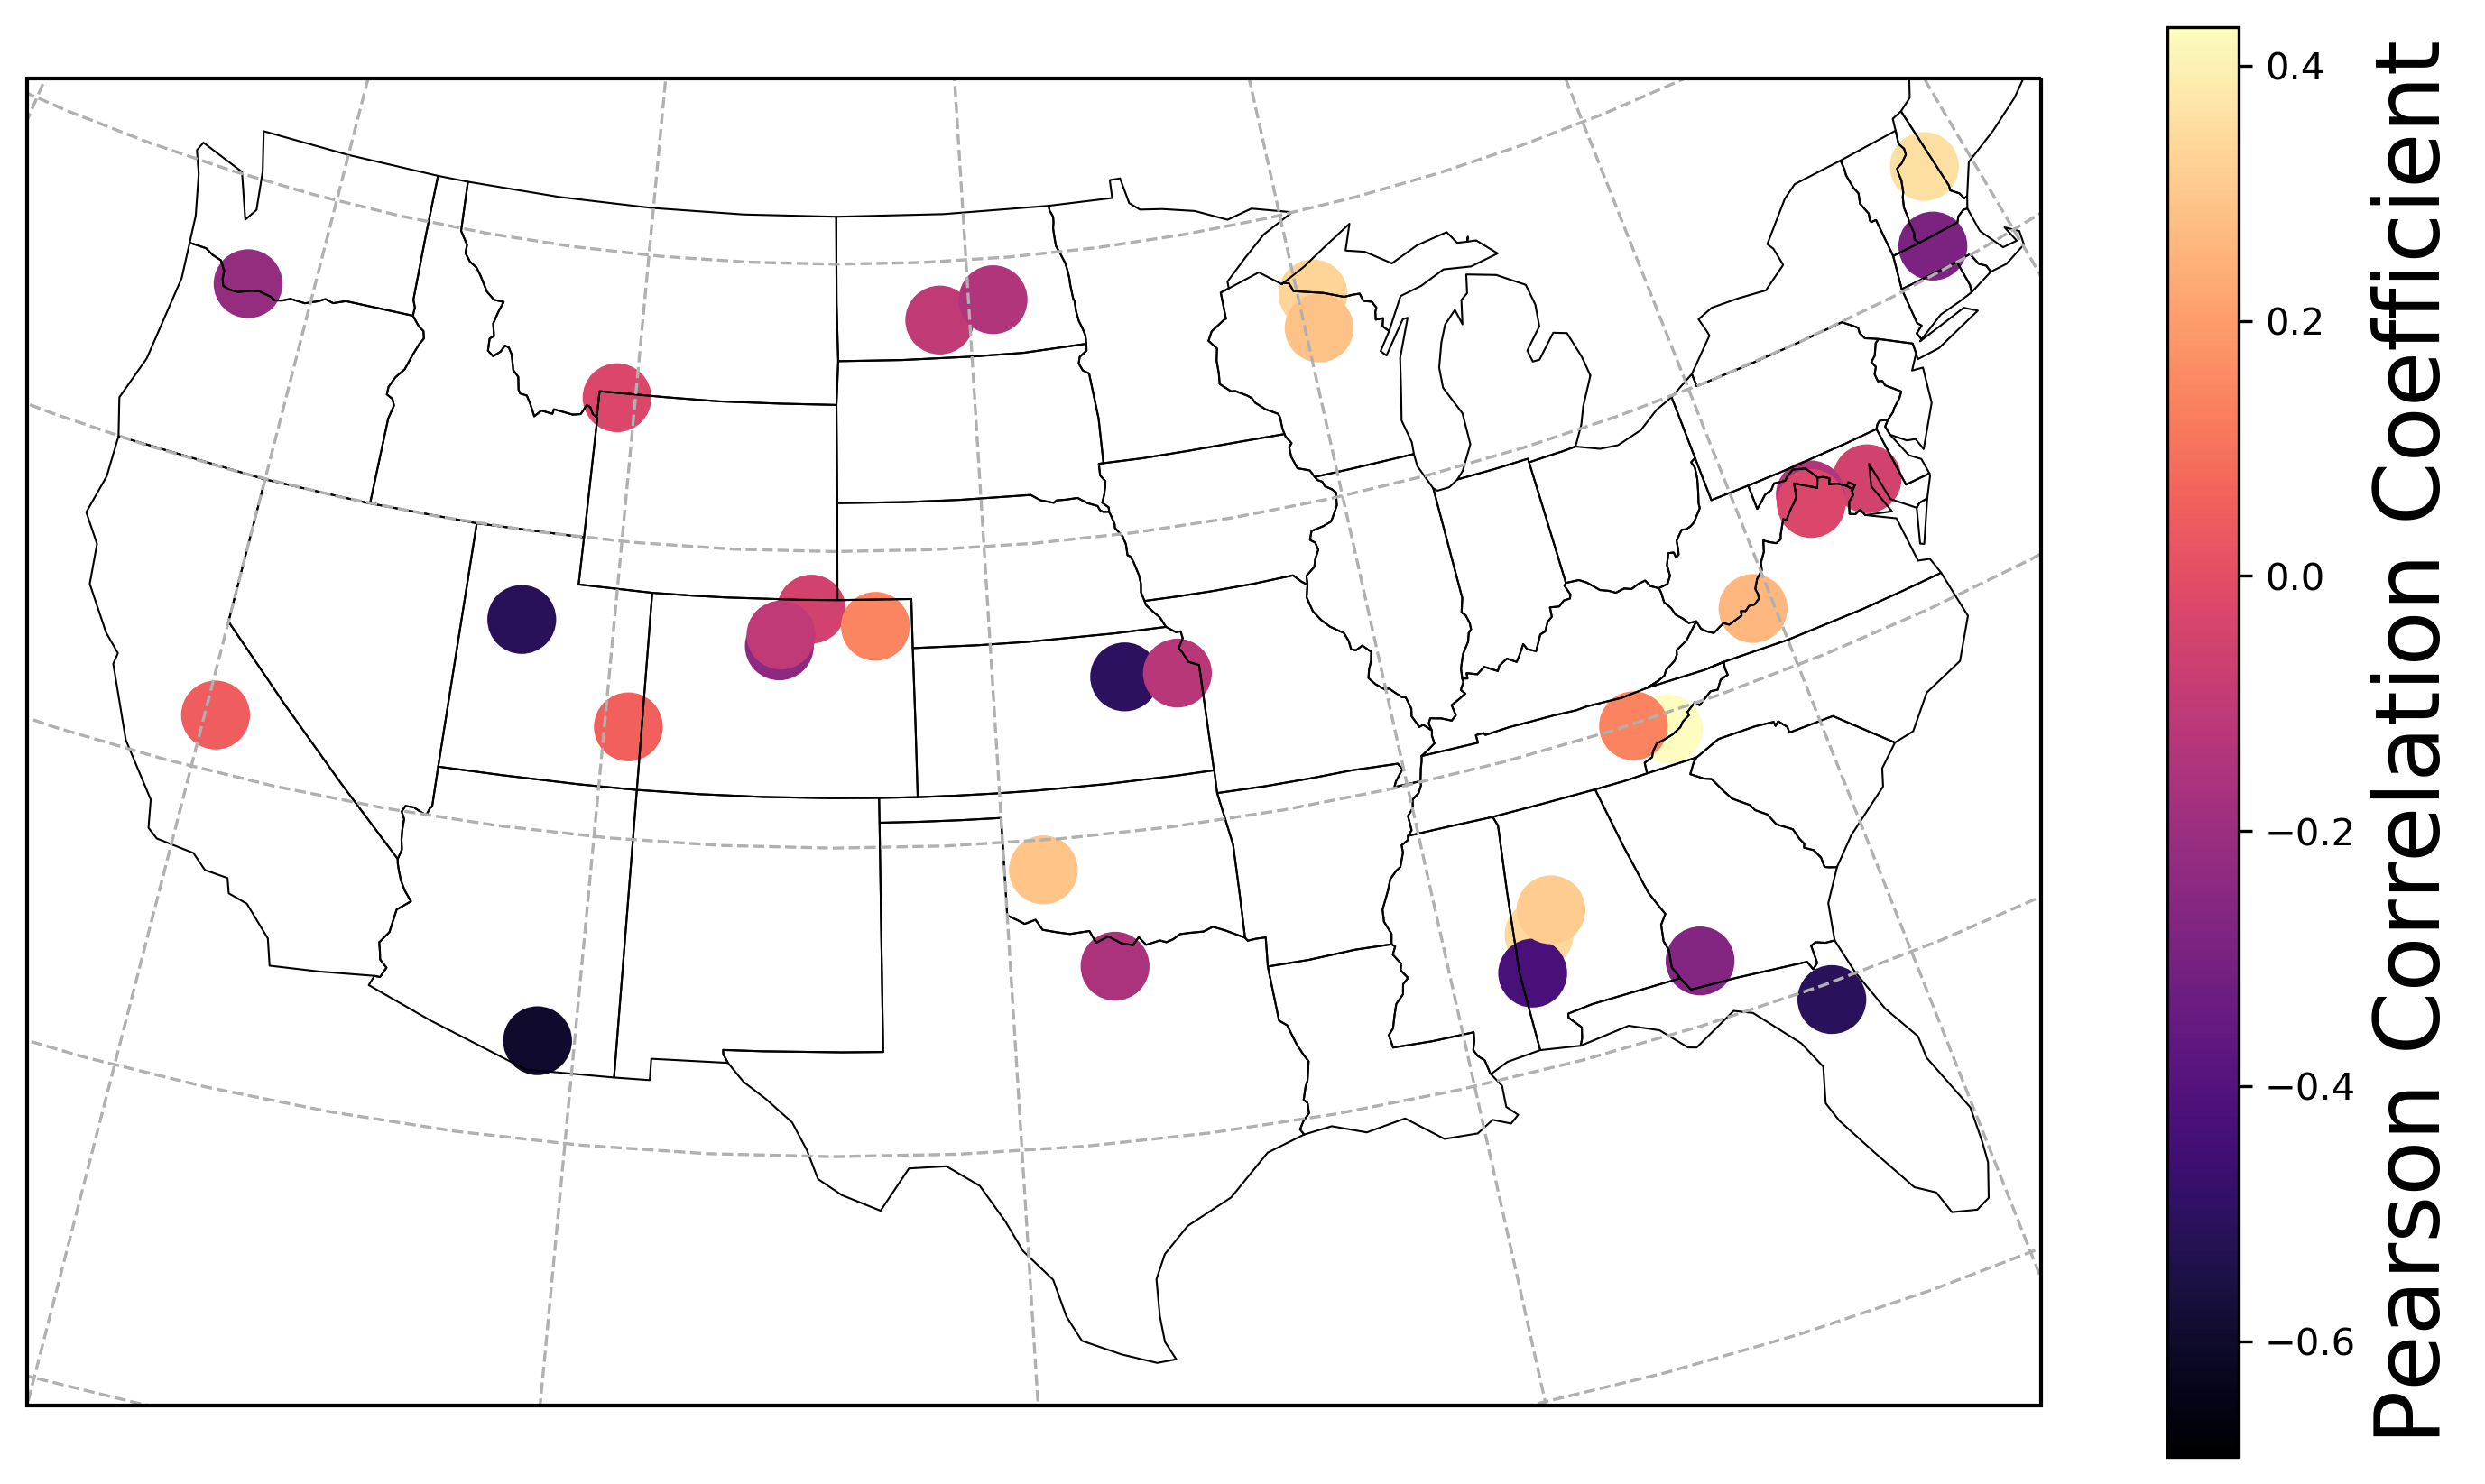

In [7]:
# creating summary maps

## Python Import Statements
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os

ROOTDIR = os.getcwd() # Home directory
CODEDIR = ROOTDIR + '/CODE/' # Code directory
DATADIR = ROOTDIR + '/DATA/' # Data directory

plt.rcParams["figure.dpi"] = 300

'''Try to run the code below first, 
    which should give you a map for CNUS'''

canada_east = -80
canada_west = -120
canada_north = 49
canada_south = 23.5

standard_parallels = (49, 77)
central_longitude = -104 

plt.figure(1,figsize = (12,7))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
'''The code right below is to generate the bounding box '''

ax.set_extent([canada_west, canada_east, canada_south, canada_north],ccrs.Geodetic())
#ax.stock_img(alpha=0.2)
ax.gridlines(linestyle='--')


df_summary = pd.read_csv(ROOTDIR+'/FIGURES/'+'Site_Summary_Table.csv')
lat = df_summary['Latitude']
long = df_summary['Longitude']
amp = df_summary['Amplitude']
mean = df_summary['d18O Mean']
std = df_summary['d18O Std']
correlation = df_summary['Correlation']

ax.add_feature(cfeature.STATES, linewidth = 0.5) ####state boundaries

plt.scatter(long, lat, alpha=1, s=300,
           c=correlation, #change this variable to what you would like to map
            cmap=plt.get_cmap("magma"), 
            transform=ccrs.PlateCarree())

cbar = plt.colorbar()
cbar.set_label("Pearson Correlation Coefficient", fontsize=24)
#cbar.set_label("$\delta^{18}$O Standard Deviation [‰]", fontsize=24)


plt.savefig(ROOTDIR+'/FIGURES/'+'Correlation', transparent=True)